Processing ../../evaluation/input/file1.png...


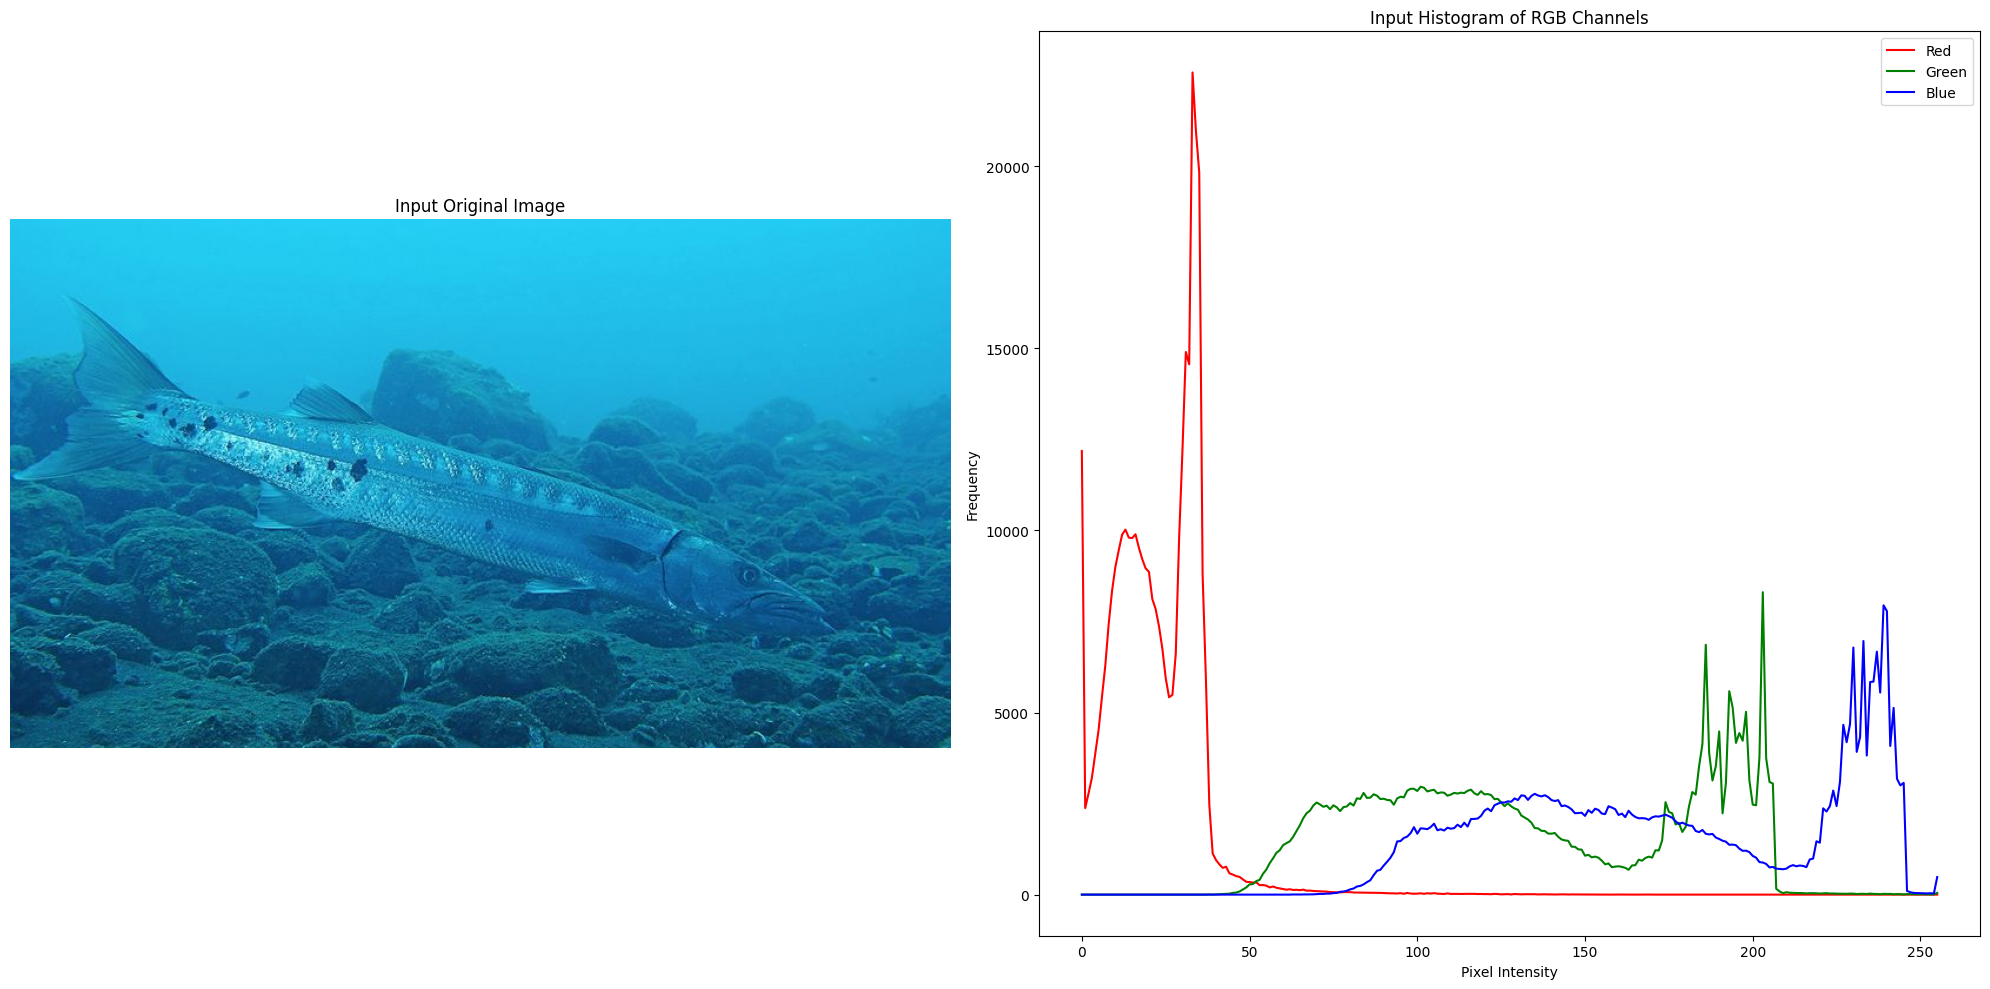

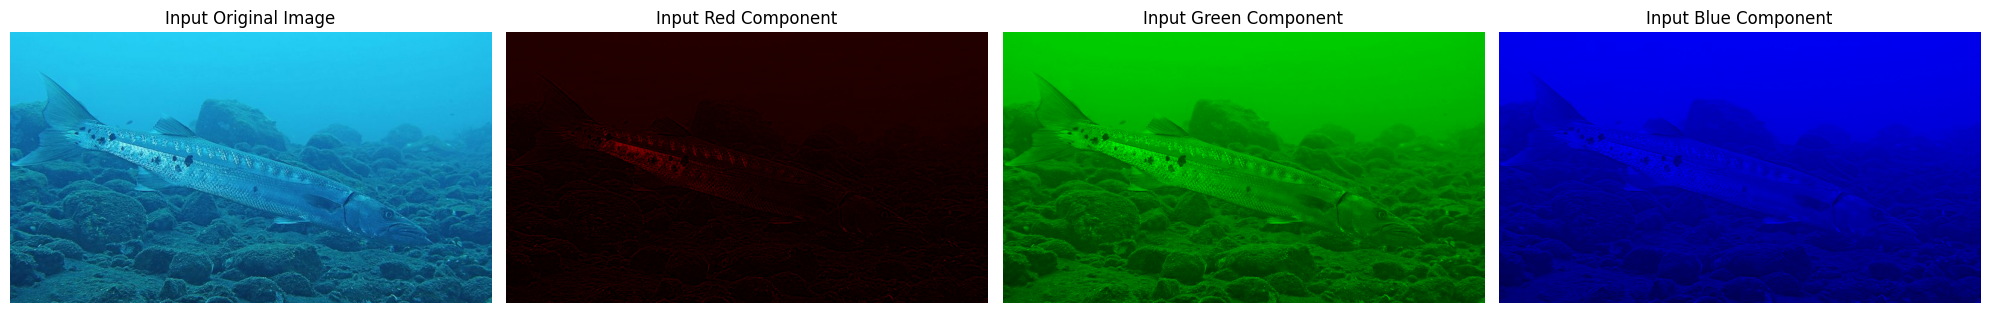

Processing ../../evaluation/output/file1_ColourCorrected_out.png...


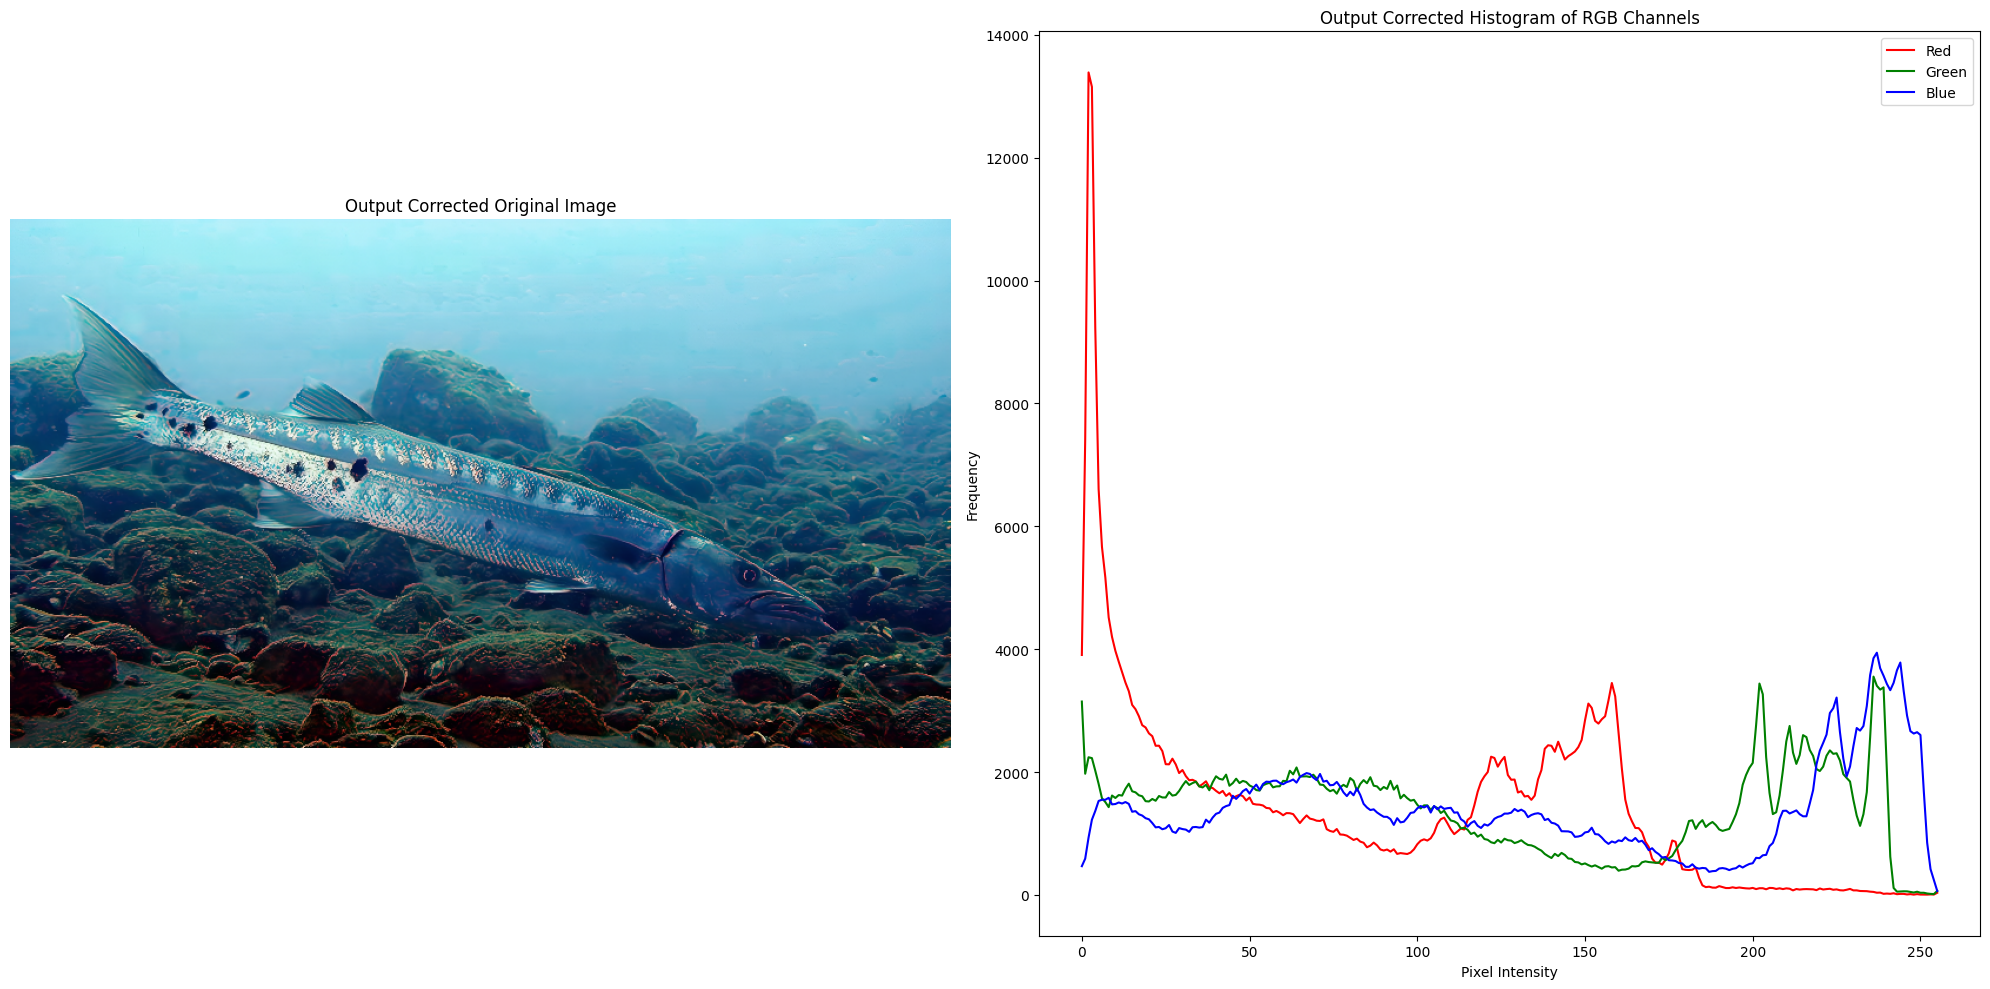

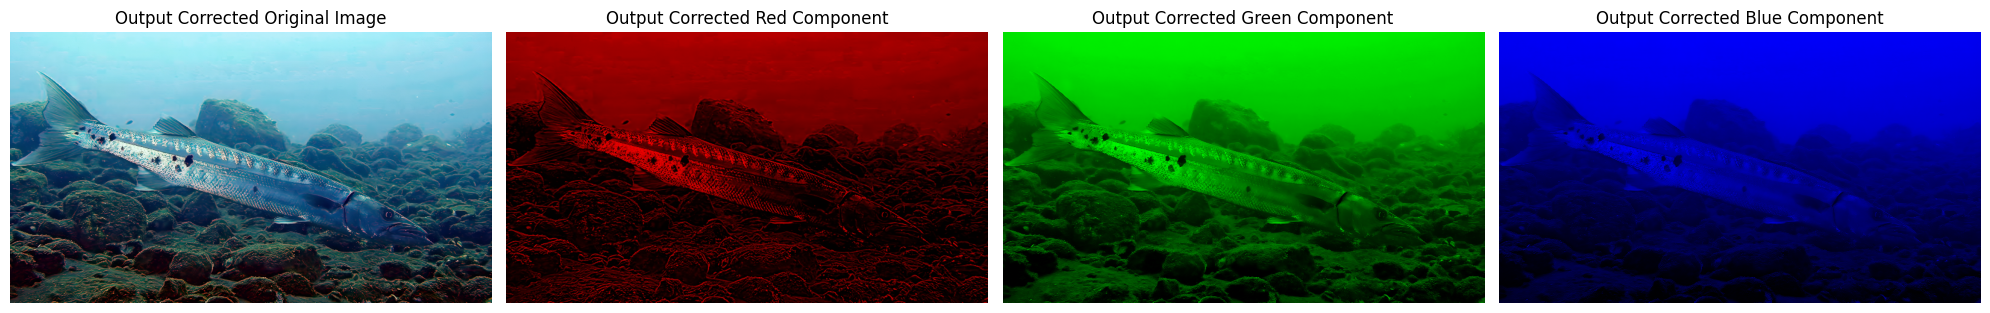

Processing ../../evaluation/output-ip/file1_ColourCorrected.png...


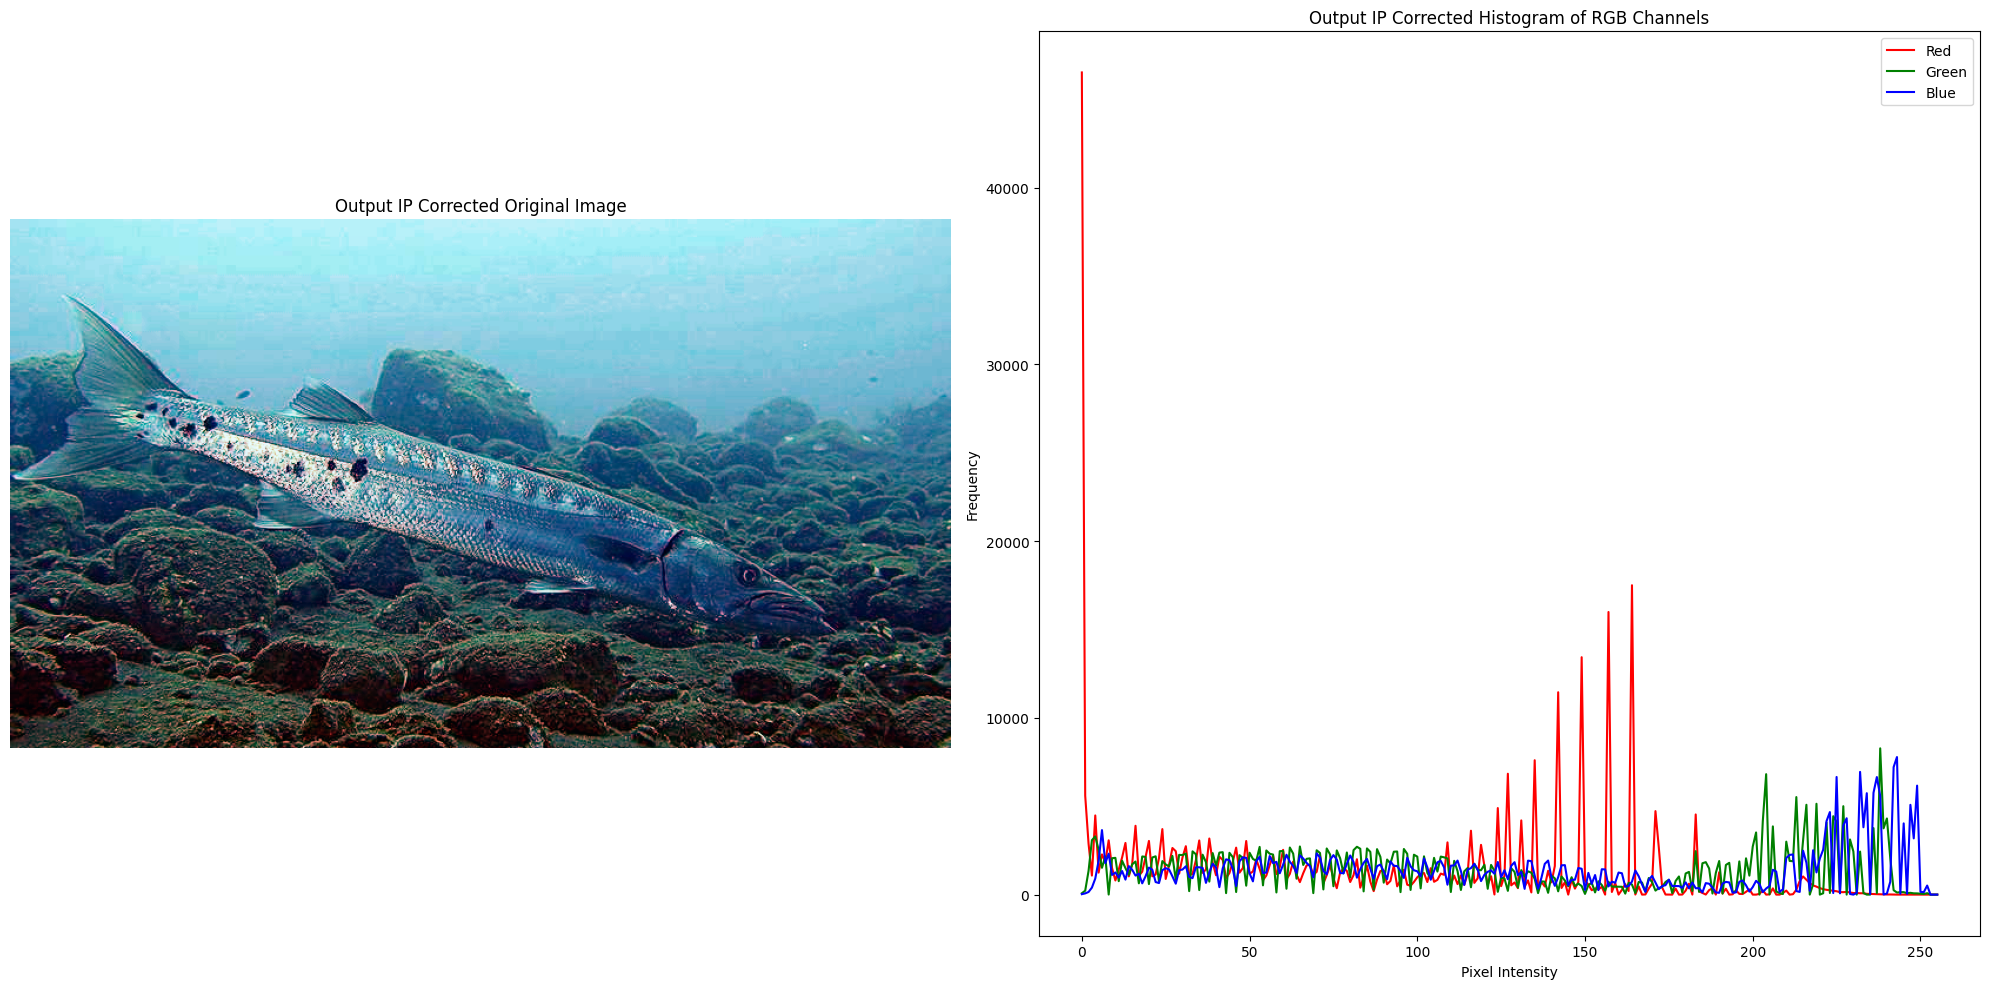

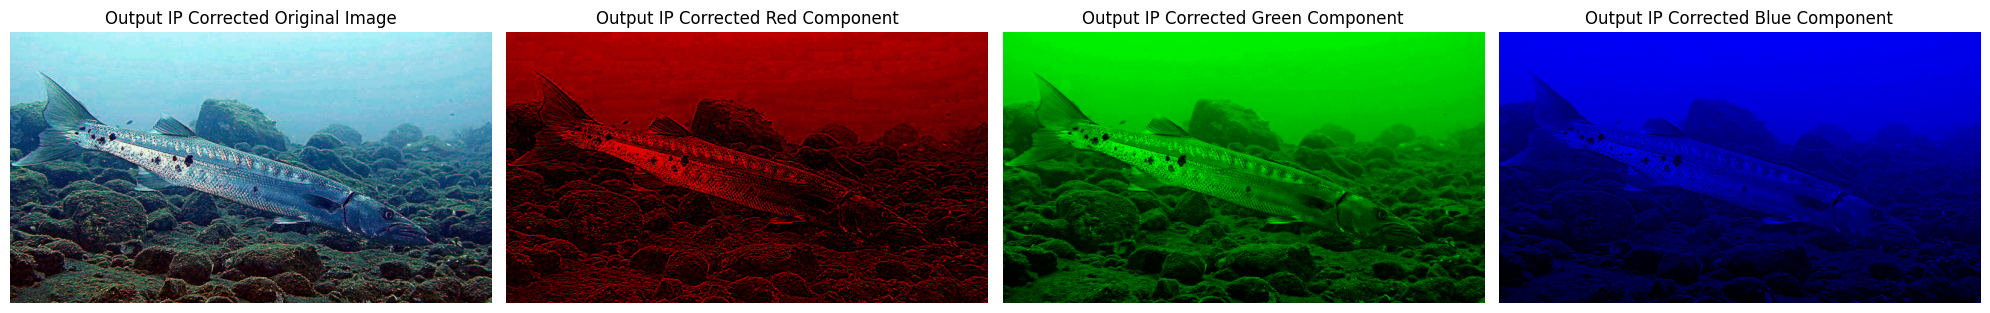

Processing ../../evaluation/reference/file1.png...


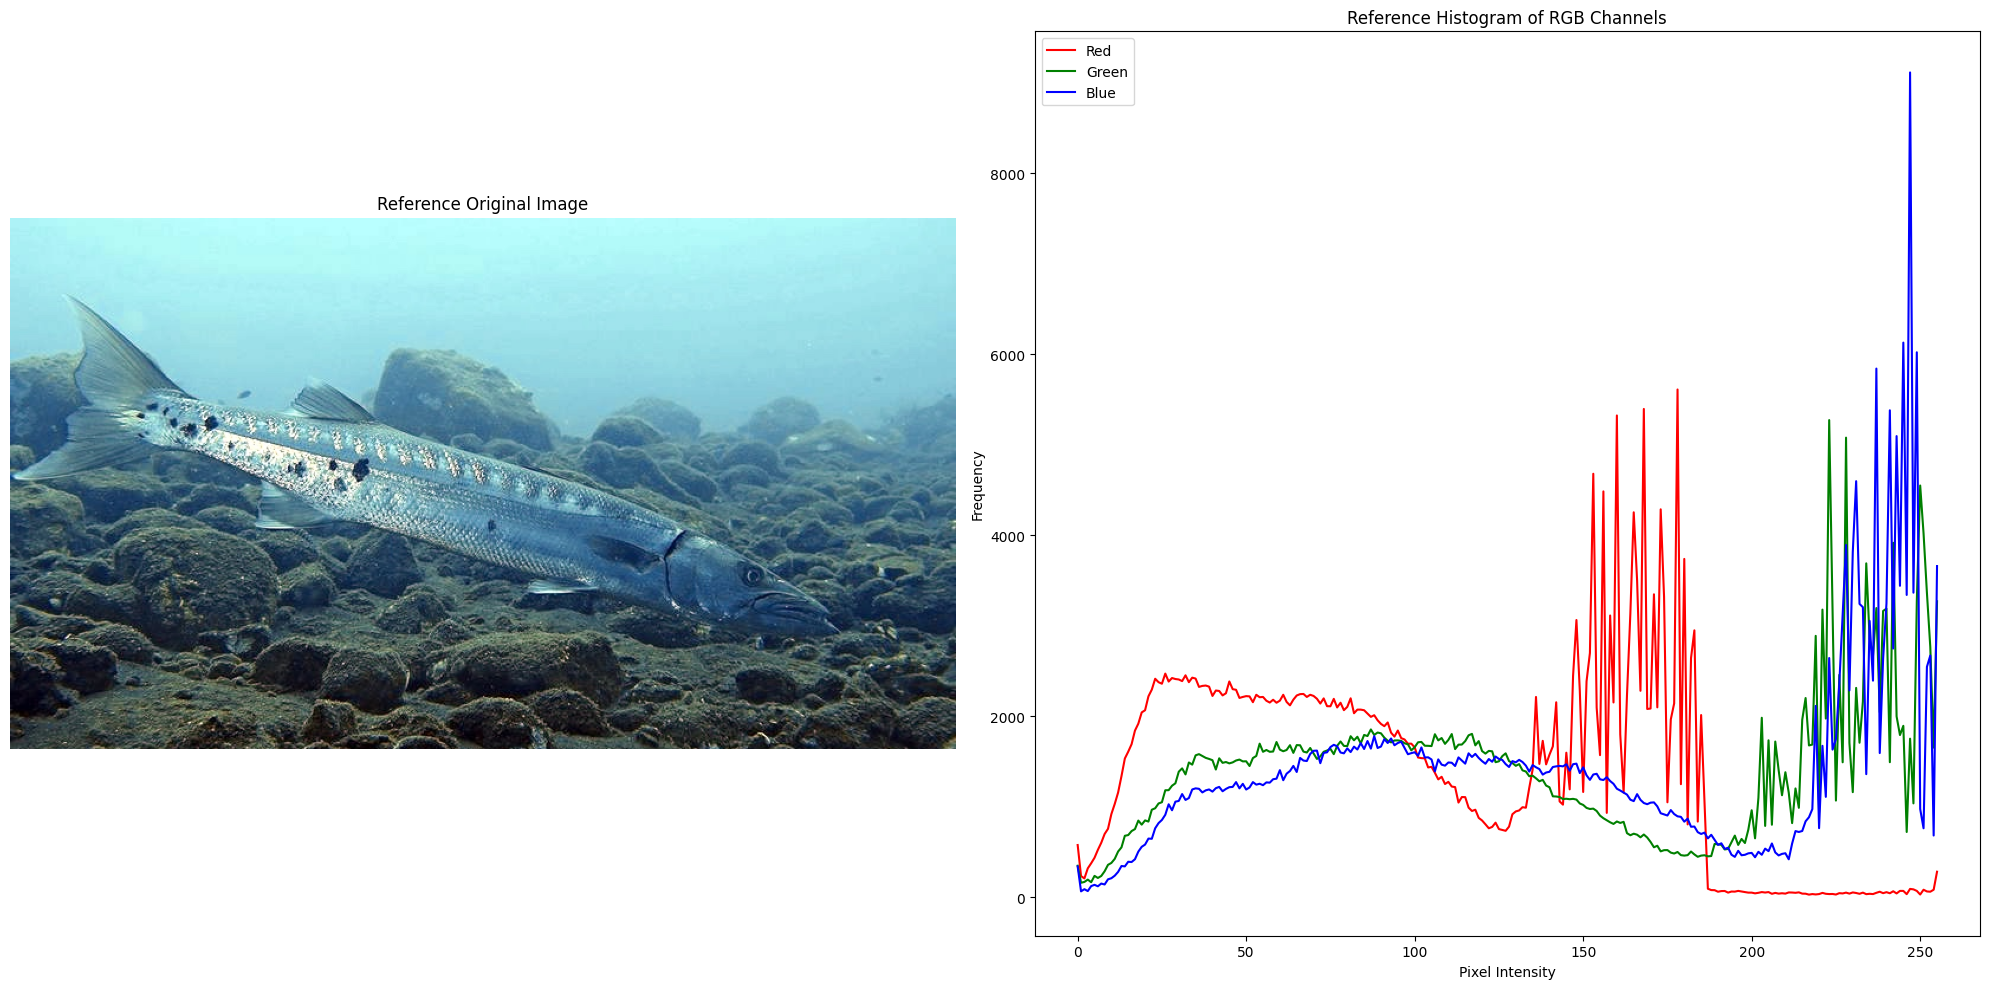

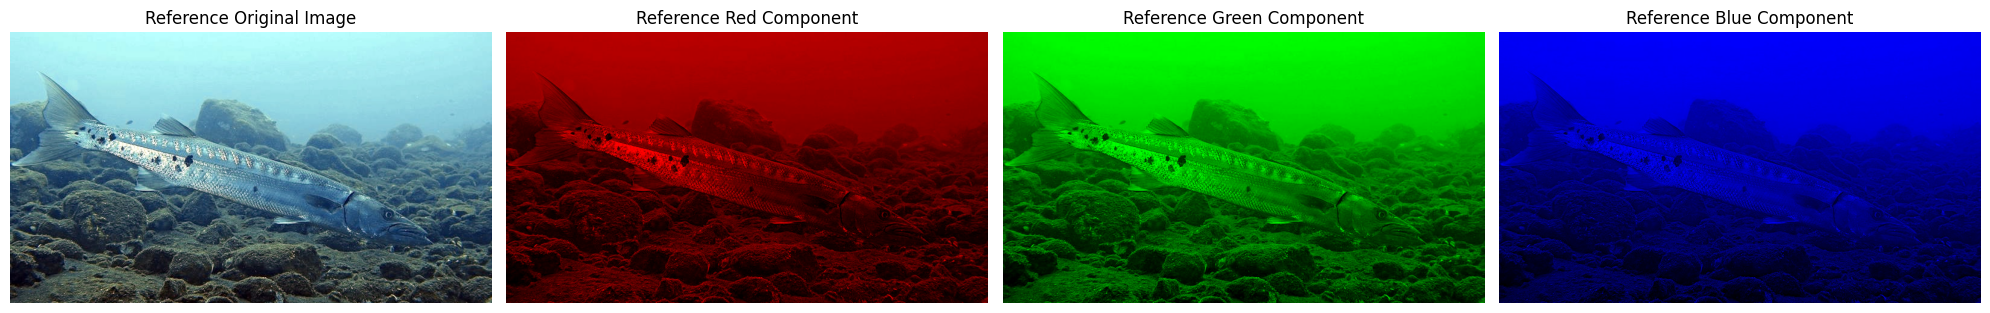

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_histogram(image, title_prefix=""):
    # Split the image into R, G, and B channels
    imageR, imageG, imageB = image.split()

    # Create a new figure with a specified size
    plt.figure(figsize=(20, 10))

    # Plot the original image in the first subplot
    plt.subplot(1, 2, 1)
    plt.title(f"{title_prefix} Original Image")
    plt.imshow(image)
    plt.axis('off')  # Hide axes for cleaner display

    # Plot the histograms of R, G, and B channels in the second subplot
    plt.subplot(1, 2, 2)
    plt.title(f"{title_prefix} Histogram of RGB Channels")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    
    # Plot histograms for R, G, B channels
    plt.plot(imageR.histogram(), color='red', label='Red')
    plt.plot(imageG.histogram(), color='green', label='Green')
    plt.plot(imageB.histogram(), color='blue', label='Blue')
    plt.legend()

    # Display the figure
    plt.tight_layout()
    plt.show()

def channel_split(image, title_prefix=""):
    # Split the image into R, G, and B channels
    imageR, imageG, imageB = image.split()

    # Get the size of the image
    x, y = image.size

    # Initialize arrays for the individual color channels
    Rchannel = np.zeros((y, x, 3), dtype="uint8")
    Gchannel = np.zeros((y, x, 3), dtype="uint8")
    Bchannel = np.zeros((y, x, 3), dtype="uint8")

    # Assign the respective color channels to the corresponding arrays
    Rchannel[:, :, 0] = imageR
    Gchannel[:, :, 1] = imageG
    Bchannel[:, :, 2] = imageB

    # Convert the arrays back to images
    Rchannel = Image.fromarray(Rchannel)
    Gchannel = Image.fromarray(Gchannel)
    Bchannel = Image.fromarray(Bchannel)

    # Plot the original and individual color channel images
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.title(f"{title_prefix} Original Image")
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title(f"{title_prefix} Red Component")
    plt.imshow(Rchannel)
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title(f"{title_prefix} Green Component")
    plt.imshow(Gchannel)
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title(f"{title_prefix} Blue Component")
    plt.imshow(Bchannel)
    plt.axis('off')

    # Display the figure
    plt.tight_layout()
    plt.show()

# Hardcoded image paths
image_paths = [
    ("../../evaluation/input/file1.png", "Input"),
    ("../../evaluation/output/file1_ColourCorrected_out.png", "Output Corrected"),
    ("../../evaluation/output-ip/file1_ColourCorrected.png", "Output IP Corrected"),
    ("../../evaluation/reference/file1.png", "Reference")
]

# Process each image
if __name__ == "__main__":
    for path, title_prefix in image_paths:
        try:
            # Load the image and ensure it's in RGB format
            image = Image.open(path).convert('RGB')
            print(f"Processing {path}...")
            plot_histogram(image, title_prefix)
            channel_split(image, title_prefix)
        except FileNotFoundError:
            print(f"Error: '{path}' not found. Please ensure the file exists.")
        except Exception as e:
            print(f"Error processing '{path}': {str(e)}")